In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [74]:
data=pd.read_csv('microsoft_stocks.csv')
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


In [75]:
data.dropna()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313
...,...,...,...,...,...,...,...
1920,2022-08-26,280.339996,267.980011,279.079987,268.089996,27549300.0,268.089996
1921,2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0,265.230011
1922,2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0,262.970001
1923,2022-08-31,267.109985,261.329987,265.390015,261.470001,24791800.0,261.470001


In [76]:
# Separate non-numerical and numerical columns
non_numerical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns
print(non_numerical_cols)
print(numerical_cols)

Index(['Date'], dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [77]:
# Split the data into features and target
features = data[numerical_cols].drop('Close', axis=1)
target = data['Close'] 

In [78]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract useful numerical features from 'Date'
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [79]:
data = data.drop('Date', axis=1)

In [80]:
# Scale the numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))
print(scaled_features)
print(scaled_target)

[[0.02201146 0.02195186 0.02326804 0.10032435 0.01776137]
 [0.02320913 0.02096006 0.02178915 0.17216072 0.01707384]
 [0.01780339 0.01950541 0.01846983 0.13783987 0.01592799]
 ...
 [0.7325607  0.73042844 0.74382154 0.09485379 0.74498538]
 [0.73275491 0.73264341 0.73961489 0.10737215 0.74007577]
 [0.712621   0.71307192 0.71818719 0.09792232 0.73657355]]
[[0.02083745]
 [0.02004491]
 [0.01872399]
 ...
 [0.73535437]
 [0.73040094]
 [0.72686746]]


In [81]:
train_size = int(len(scaled_data) * 0.8)
X_train, X_test = scaled_data.iloc[:train_size, :], scaled_data.iloc[train_size:, :]
y_train, y_test = scaled_target[:train_size], scaled_target[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1540, 5)
y_train shape: (1540, 1)
X_test shape: (385, 5)
y_test shape: (385, 1)


In [82]:
# Reshape the data for LSTM input
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))


In [83]:
# Create the LSTM model
from keras.layers import Input
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Explicitly add Input layer
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [84]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [85]:
# Ensure X_train and y_train are in the correct format
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [86]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0222
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3900e-04
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4120e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1937e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3605e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8985e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0197e-04
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8227e-04
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7860e-04
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5442e-04
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2355e-04
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0878e-04
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1803e-04
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6970e-04
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━

In [87]:
y_pred = model.predict(X_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [88]:
# Inverse scale the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [89]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [90]:
# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared Value:', r2)


Mean Squared Error (MSE): 49.86066925641596
Mean Absolute Error (MAE): 5.290523182262072
R-squared Value: 0.9402772671824355


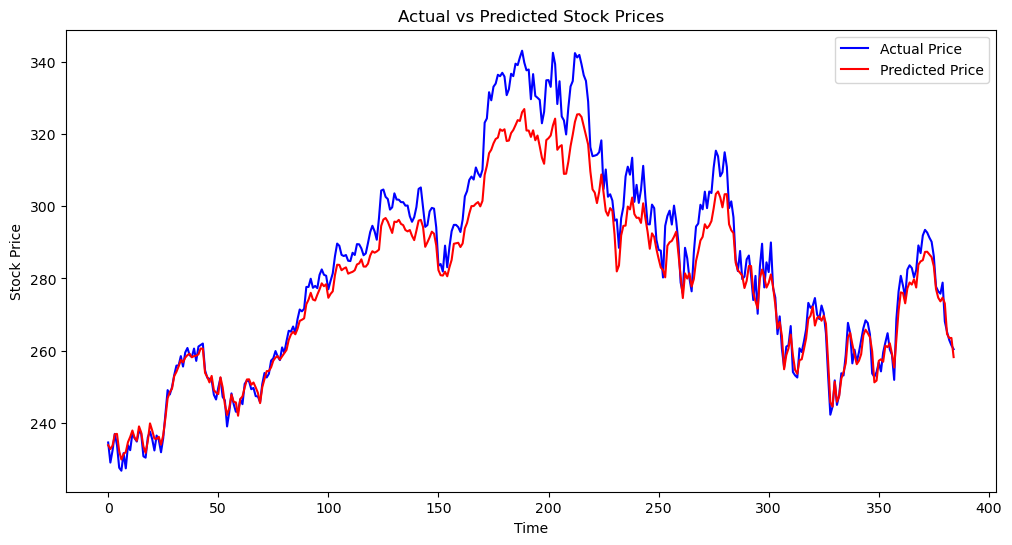

In [91]:
# Plotting the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()